In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import torch

dataset = torch.load('shortened_numerical_fake_data_demographicless.pt')

full_data_size = len(dataset)
train_size = int(full_data_size * 0.8)
print(f"Train Data Size: {train_size}")

gen = torch.Generator()
gen.manual_seed(0)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, full_data_size - train_size], generator=gen)

X = [point['inputs'] for point in train_dataset]
y = [[point['target']] for point in train_dataset]
regressor = RandomForestRegressor(max_features='log2')
regressor.fit(X, y)

Train Data Size: 17576


/Users/Yourui/Documents/nochances/nochances/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='log2')

Accuracy: 0.8495675921711424


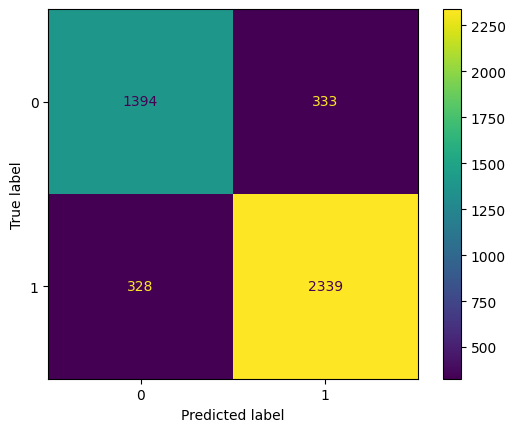

In [17]:
X_val = [point['inputs'] for point in test_dataset]
y_val = [int(point['target']) for point in test_dataset]

y_pred = regressor.predict(X_val) > .5

print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

In [14]:
import pickle

with open('random_forest_regressor.pkl','wb') as f:
    pickle.dump(regressor, f)

In [18]:
importances = regressor.feature_importances_
importances

array([0.00351589, 0.00608637, 0.0056375 , 0.00309861, 0.1006111 ,
       0.0015642 , 0.00120753, 0.00199591, 0.00158565, 0.00446028,
       0.00243821, 0.00125261, 0.00173137, 0.00227749, 0.00143748,
       0.00195036, 0.00193335, 0.00347855, 0.00311661, 0.00345111,
       0.00075708, 0.0020468 , 0.00174514, 0.00247484, 0.00226404,
       0.0156547 , 0.08533799, 0.07033498, 0.07231501, 0.0236998 ,
       0.05186822, 0.00409737, 0.00048809, 0.00504881, 0.00515954,
       0.00467515, 0.00484312, 0.00472824, 0.00455041, 0.00389651,
       0.00427729, 0.0036014 , 0.00338296, 0.00353097, 0.00327933,
       0.00390375, 0.00070346, 0.00029585, 0.00436612, 0.00482378,
       0.00420157, 0.0043646 , 0.00390488, 0.00398414, 0.00385076,
       0.00365748, 0.00315126, 0.00323887, 0.00316328, 0.00310017,
       0.00281536, 0.00051823, 0.00029563, 0.00462373, 0.0040766 ,
       0.00464831, 0.0044191 , 0.00397272, 0.00386852, 0.00385141,
       0.00320417, 0.00291716, 0.00303008, 0.00285683, 0.00282